<a href="https://colab.research.google.com/github/jocelynbaduria/cmpe-297_SOTA/blob/main/AutoVimL_TabularSample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ReadMe: 

Reference:

https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_Titanic.ipynb

1. Reproduce the tutorial using two different dataset with three different target of predictions.

  a. Use my own dataset taken from Google Big Query public dataset lightning data. Target = count_lightning, Center Point Geometry.

  https://console.cloud.google.com/marketplace/product/noaa-public/lightning?project=fire-responder-asp77
  
  b. Use California dataset, Target = households

In [4]:
!pip install deep_autoviml -q

     |████████████████████████████████| 269 kB 10.5 MB/s 
     |████████████████████████████████| 14.5 MB 33 kB/s 
     |████████████████████████████████| 308 kB 48.1 MB/s 
     |████████████████████████████████| 4.4 MB 39.1 MB/s 
     |████████████████████████████████| 23.2 MB 2.0 MB/s 
     |████████████████████████████████| 170 kB 54.1 MB/s 
     |████████████████████████████████| 80 kB 8.6 MB/s 
     |████████████████████████████████| 209 kB 66.1 MB/s 
     |████████████████████████████████| 75 kB 4.3 MB/s 
     |████████████████████████████████| 111 kB 53.0 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 144 kB 36.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,

In [5]:
from deep_autoviml import deep_autoviml as deepauto


Imported deep_auto_viml. version=0.0.67
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from split_data_n_ways import split_data_n_ways, fast_classify_features
from sklearn.preprocessing import LabelEncoder
LLB = LabelEncoder()
from deep_autoviml import deep_autoviml as deep_autoviml

### 1.  Ground Lightning Data 
Target = Center Point Geometry

In [33]:
data ='/content/drive/MyDrive/cmpe-297-SOTA/data/'
filename = 'lightningdata.csv'
train_data = data+filename
target = 'Center Point Geometry'

In [34]:
train = pd.read_csv(train_data, header=0, sep=',')
print(train.shape)
train.head(5)

(56772, 6)


,date,state,zip_code,city,count_lightning,Center Point Geometry
0,"Jan 10, 2016",New York,12538,"Fairview CDP, Hyde Park CDP, Haviland CDP",2,0.00
1,"Jan 10, 2016",New York,11795,West Islip CDP,1,0.00
2,"Jan 10, 2016",New York,11726,"Copiague CDP, North Amityville CDP, North Lind...",2,0.00
3,"Jan 10, 2016",New York,12446,Kerhonkson CDP,1,0.00
4,"Jan 10, 2016",New York,12060,East chatham,2,0.00


In [35]:
#load dataset
train, test = train_test_split(train, test_size=0.2, random_state=99)

In [36]:
print(train.shape, test.shape)
test.head(5)

(45417, 6) (11355, 6)


,date,state,zip_code,city,count_lightning,Center Point Geometry
56022,"Jul 16, 2020",New York,14111,North Collins village,13,0.00
50146,"Sep 21, 2018",New York,14757,"Mayville village, Chautauqua CDP",39,0.00
23772,"Jun 30, 2017",New York,13659,Lorraine CDP,3,0.00
27878,"Jul 24, 2017",New York,14519,Ontario CDP,12,0.00
16758,"Apr 28, 2017",New York,13844,South plymouth,2,0.00


In [38]:
keras_model_type =  "auto" ## always try "fast1" first, then "fast2", then "auto".
##  If NLP, use "BERT" and if image, use "image" for keras_model_type. ###
model_options = {"tuner":"storm", 'nlp_char_limit':50, 'cat_feat_cross_flag':"", 'max_trials': 5}
keras_options = {"patience":10,'class_weight':True, "early_stopping": True, "lr_scheduler": "", "optimizer": "RMS","epochs": 100}

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    epochs : 100
    optimizer : RMS
    class_weight : True
    lr_scheduler : 
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : 
    nlp_char_limit : 50
    max_trials : 5
    tuner : storm
Max Trials : 5. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Regression and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables i

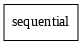

Model plot saved in file: deep_autoviml_jbb_autoviml_tabular_auto_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {}
    original datasize = 45417, initial batchsize = 48
    Early stopping : True
    recommended steps per epoch = 300
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 47400
    number of classes = 1, output_activation = linear
    loss function: mae
    steps_per_epoch = 300, number epochs = 100
    val mode = min, val monitor = val_rmse, patience = 10
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default

Splitting train into 80+20 percent: train and validation data
    Splitting validat

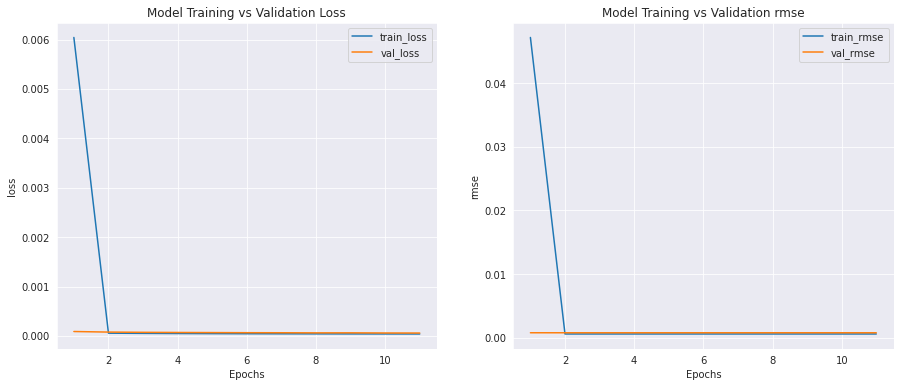

Time taken to train model (in mins) = 5
    Stopped epoch = 1
Held out data actuals shape: (4560,)
    samples from label: [4.9e-05, 5.5e-05, 0.000111, 4.9e-05, 0.000177, 4.9e-05, 6.1e-05, 5.5e-05, 6.1e-05, 6.1e-05]

Held out predictions shape:(4560,)
    Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

###########################################################
         Held-out test data set Results:
Regression Plots completed in 0.036 seconds
    MAE = 0.0001
    MAPE = 58%
    RMSE = 0.0008
    MAE as % std dev of Actuals = 9.1%
    R-Squared (% ) = -0%
    Normalized RMSE (% of Std Dev of Actuals) = 100%
Saved predictions in jbb_autoviml_tabular/jbb_autoviml_tabular_predictions.csv file

Finally, training on full train dataset. This will take time...
    best learning rate = 0.00091655727
    set learning rate using best model: 0.00091655727
    max epochs for training = 1

Model not being saved since save_model_flag set to False...
5412

Saving vocab dictionary using pickle i

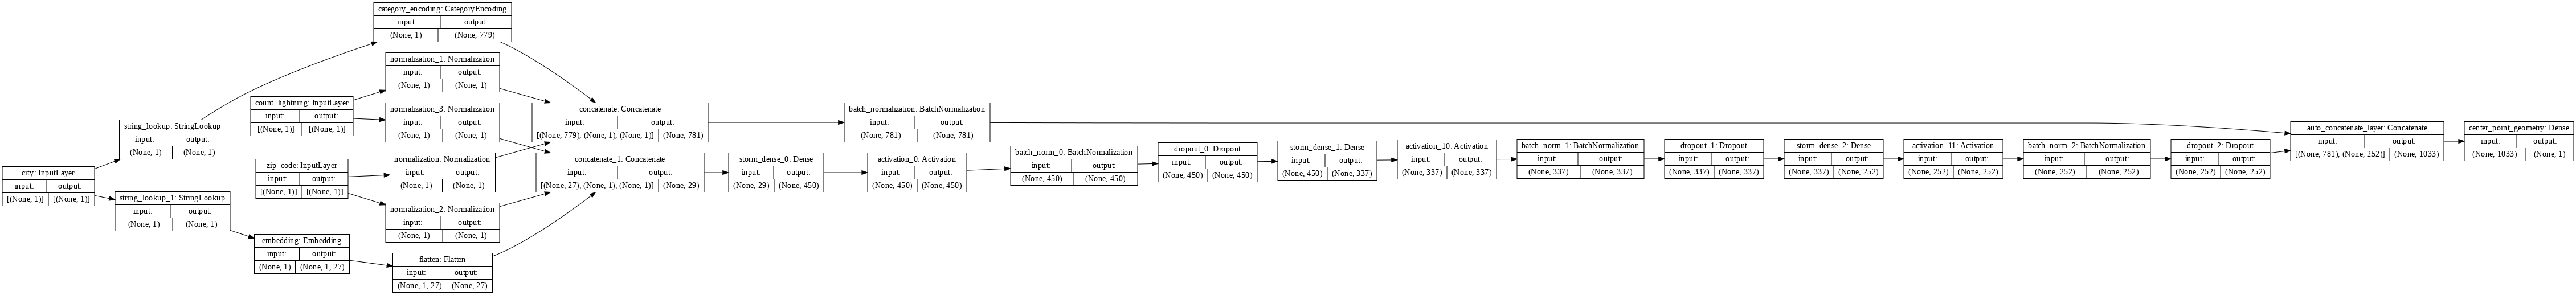

Model plot saved in file: deep_autoviml_jbb_autoviml_tabular_auto_model_after.png


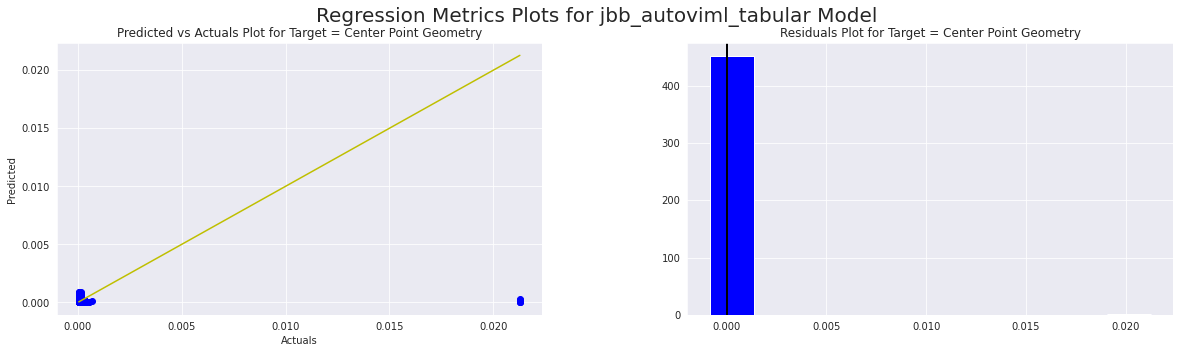

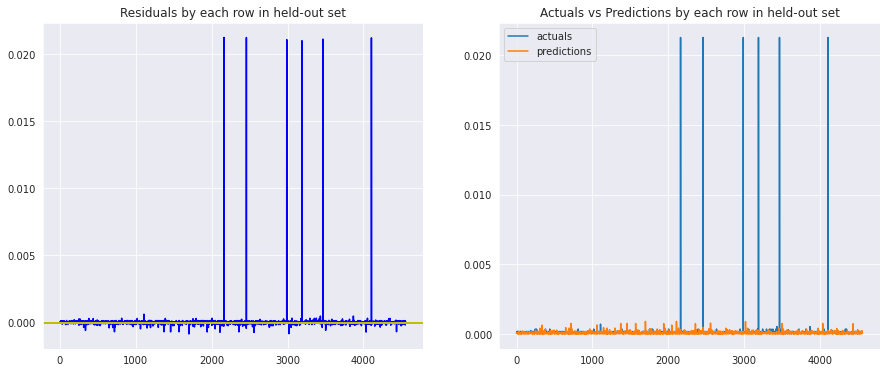

In [39]:
output = deepauto.fit(train, target, keras_model_type,project_name="jbb_autoviml_tabular", keras_options=keras_options,
                 model_options=model_options, save_model_flag=False, use_my_model='', verbose=1)

### 2. Ground Lightning Data
Target = Count of Lightning

In [40]:
data ='/content/drive/MyDrive/cmpe-297-SOTA/data/'
filename = 'lightningdata.csv'
train_data = data+filename
target = 'count_lightning'

In [41]:
keras_model_type =  "auto" ## always try "fast1" first, then "fast2", then "auto".
##  If NLP, use "BERT" and if image, use "image" for keras_model_type. ###
model_options = {"tuner":"storm", 'nlp_char_limit':50, 'cat_feat_cross_flag':"", 'max_trials': 5}
keras_options = {"patience":10,'class_weight':True, "early_stopping": True, "lr_scheduler": "", "optimizer": "RMS","epochs": 100}

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    epochs : 100
    optimizer : RMS
    class_weight : True
    lr_scheduler : 
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : 
    nlp_char_limit : 50
    max_trials : 5
    tuner : storm
Max Trials : 5. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Regression and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables i

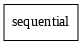

Model plot saved in file: deep_autoviml_jbb_autoviml_tabular2_auto_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {}
    original datasize = 45417, initial batchsize = 48
    Early stopping : True
    recommended steps per epoch = 300
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 47400
    number of classes = 1, output_activation = linear
    loss function: mae
    steps_per_epoch = 300, number epochs = 100
    val mode = min, val monitor = val_rmse, patience = 10
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default

Splitting train into 80+20 percent: train and validation data
    Splitting valida

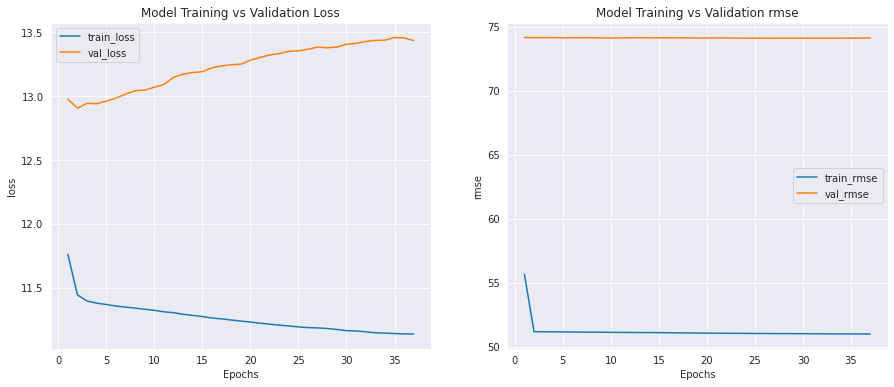

Time taken to train model (in mins) = 6
    Stopped epoch = 27
Held out data actuals shape: (4560,)
    samples from label: [11, 1, 1, 9, 3, 4, 1, 9, 11, 7]

Held out predictions shape:(4560, 1)
    Sample predictions: [5 4 2 5 6 3 3 1 3 7]

###########################################################
         Held-out test data set Results:
Regression Plots completed in 0.036 seconds
    MAE = 13.3408
    MAPE = 144%
    RMSE = 74.0031
    MAE as % std dev of Actuals = 18.2%
    R-Squared (% ) = -2%
    Normalized RMSE (% of Std Dev of Actuals) = 101%
Regression plots erroring. Continuing...

Finally, training on full train dataset. This will take time...
    best learning rate = 0.00037326047
    set learning rate using best model: 0.00037326047
    max epochs for training = 27

Model not being saved since save_model_flag set to False...
5685

Saving vocab dictionary using pickle in jbb_autoviml_tabular2/auto/model_2021_10_30-00_59_34/artifacts/cat_vocab_dict.pickle...will take time..

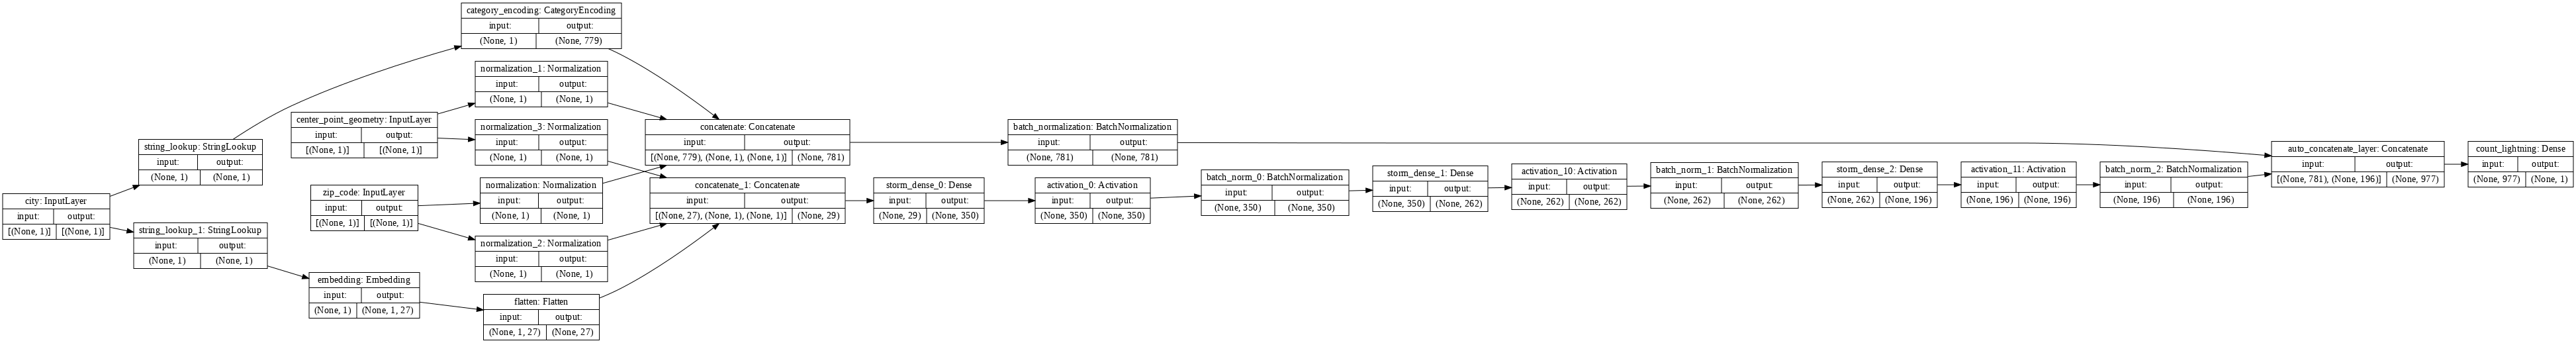

Model plot saved in file: deep_autoviml_jbb_autoviml_tabular2_auto_model_after.png


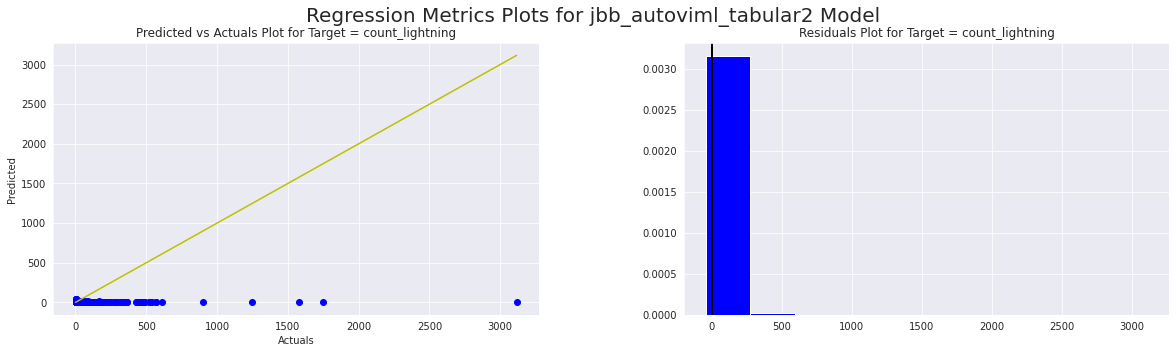

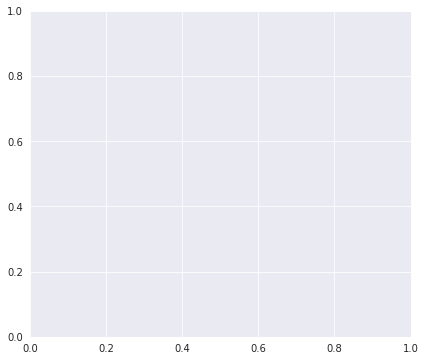

In [42]:
output = deepauto.fit(train, target, keras_model_type,project_name="jbb_autoviml_tabular2", keras_options=keras_options,
                 model_options=model_options, save_model_flag=False, use_my_model='', verbose=1)

### California Housing Data
Target = households

In [7]:
data ='/content/sample_data/'
filename = 'california_housing_train.csv'
train_data = data+filename
target = 'households'

In [9]:
train = pd.read_csv(train_data, header=0, sep=',')
print(train.shape)
train.head(5)

(17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [12]:
data ='/content/sample_data/'
filename = 'california_housing_test.csv'
train_data = data+filename
target = 'households'

In [13]:
test = pd.read_csv(train_data, header=0, sep=',')
print(test.shape)
test.head(5)

(3000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [14]:
keras_model_type =  "auto" ## always try "fast1" first, then "fast2", then "auto".
##  If NLP, use "BERT" and if image, use "image" for keras_model_type. ###
model_options = {"tuner":"storm", 'nlp_char_limit':50, 'cat_feat_cross_flag':"", 'max_trials': 5}
keras_options = {"patience":10,'class_weight':True, "early_stopping": True, "lr_scheduler": "", "optimizer": "RMS","epochs": 100}

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    epochs : 100
    optimizer : RMS
    class_weight : True
    lr_scheduler : 
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : 
    nlp_char_limit : 50
    max_trials : 5
    tuner : storm
Max Trials : 5. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Regression and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables i

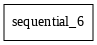

Model plot saved in file: deep_autoviml_jbb_autoviml_tabular3_auto_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {}
    original datasize = 17000, initial batchsize = 32
    Early stopping : True
    recommended steps per epoch = 265
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 26600
    number of classes = 1, output_activation = linear
    loss function: mae
    steps_per_epoch = 265, number epochs = 100
    val mode = min, val monitor = val_rmse, patience = 10
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default

Splitting train into 80+20 percent: train and validation data
    Splitting valida

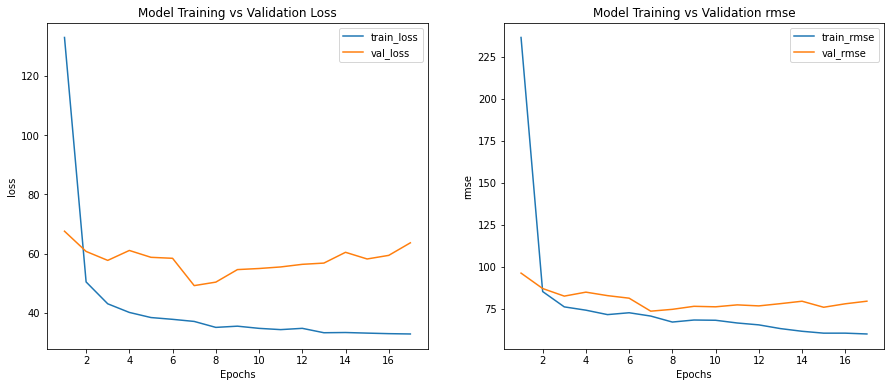

Time taken to train model (in mins) = 1
    Stopped epoch = 7
Held out data actuals shape: (1728,)
    samples from label: [472.0, 463.0, 117.0, 226.0, 262.0, 239.0, 633.0, 158.0, 1056.0, 271.0]

Held out predictions shape:(1728,)
    Sample predictions: [1114.704 1565.968  240.377  367.826  374.024  315.267  713.371  235.826
 1134.524  369.773]

###########################################################
         Held-out test data set Results:
Regression Plots completed in 0.043 seconds
    MAE = 48.2675
    MAPE = 17%
    RMSE = 73.5381
    MAE as % std dev of Actuals = 12.7%
    R-Squared (% ) = 96%
    Normalized RMSE (% of Std Dev of Actuals) = 19%
Saved predictions in jbb_autoviml_tabular3/jbb_autoviml_tabular3_predictions.csv file

Finally, training on full train dataset. This will take time...
    best learning rate = 0.00081521244
    set learning rate using best model: 0.00081521244
    max epochs for training = 7

Model not being saved since save_model_flag set to False...


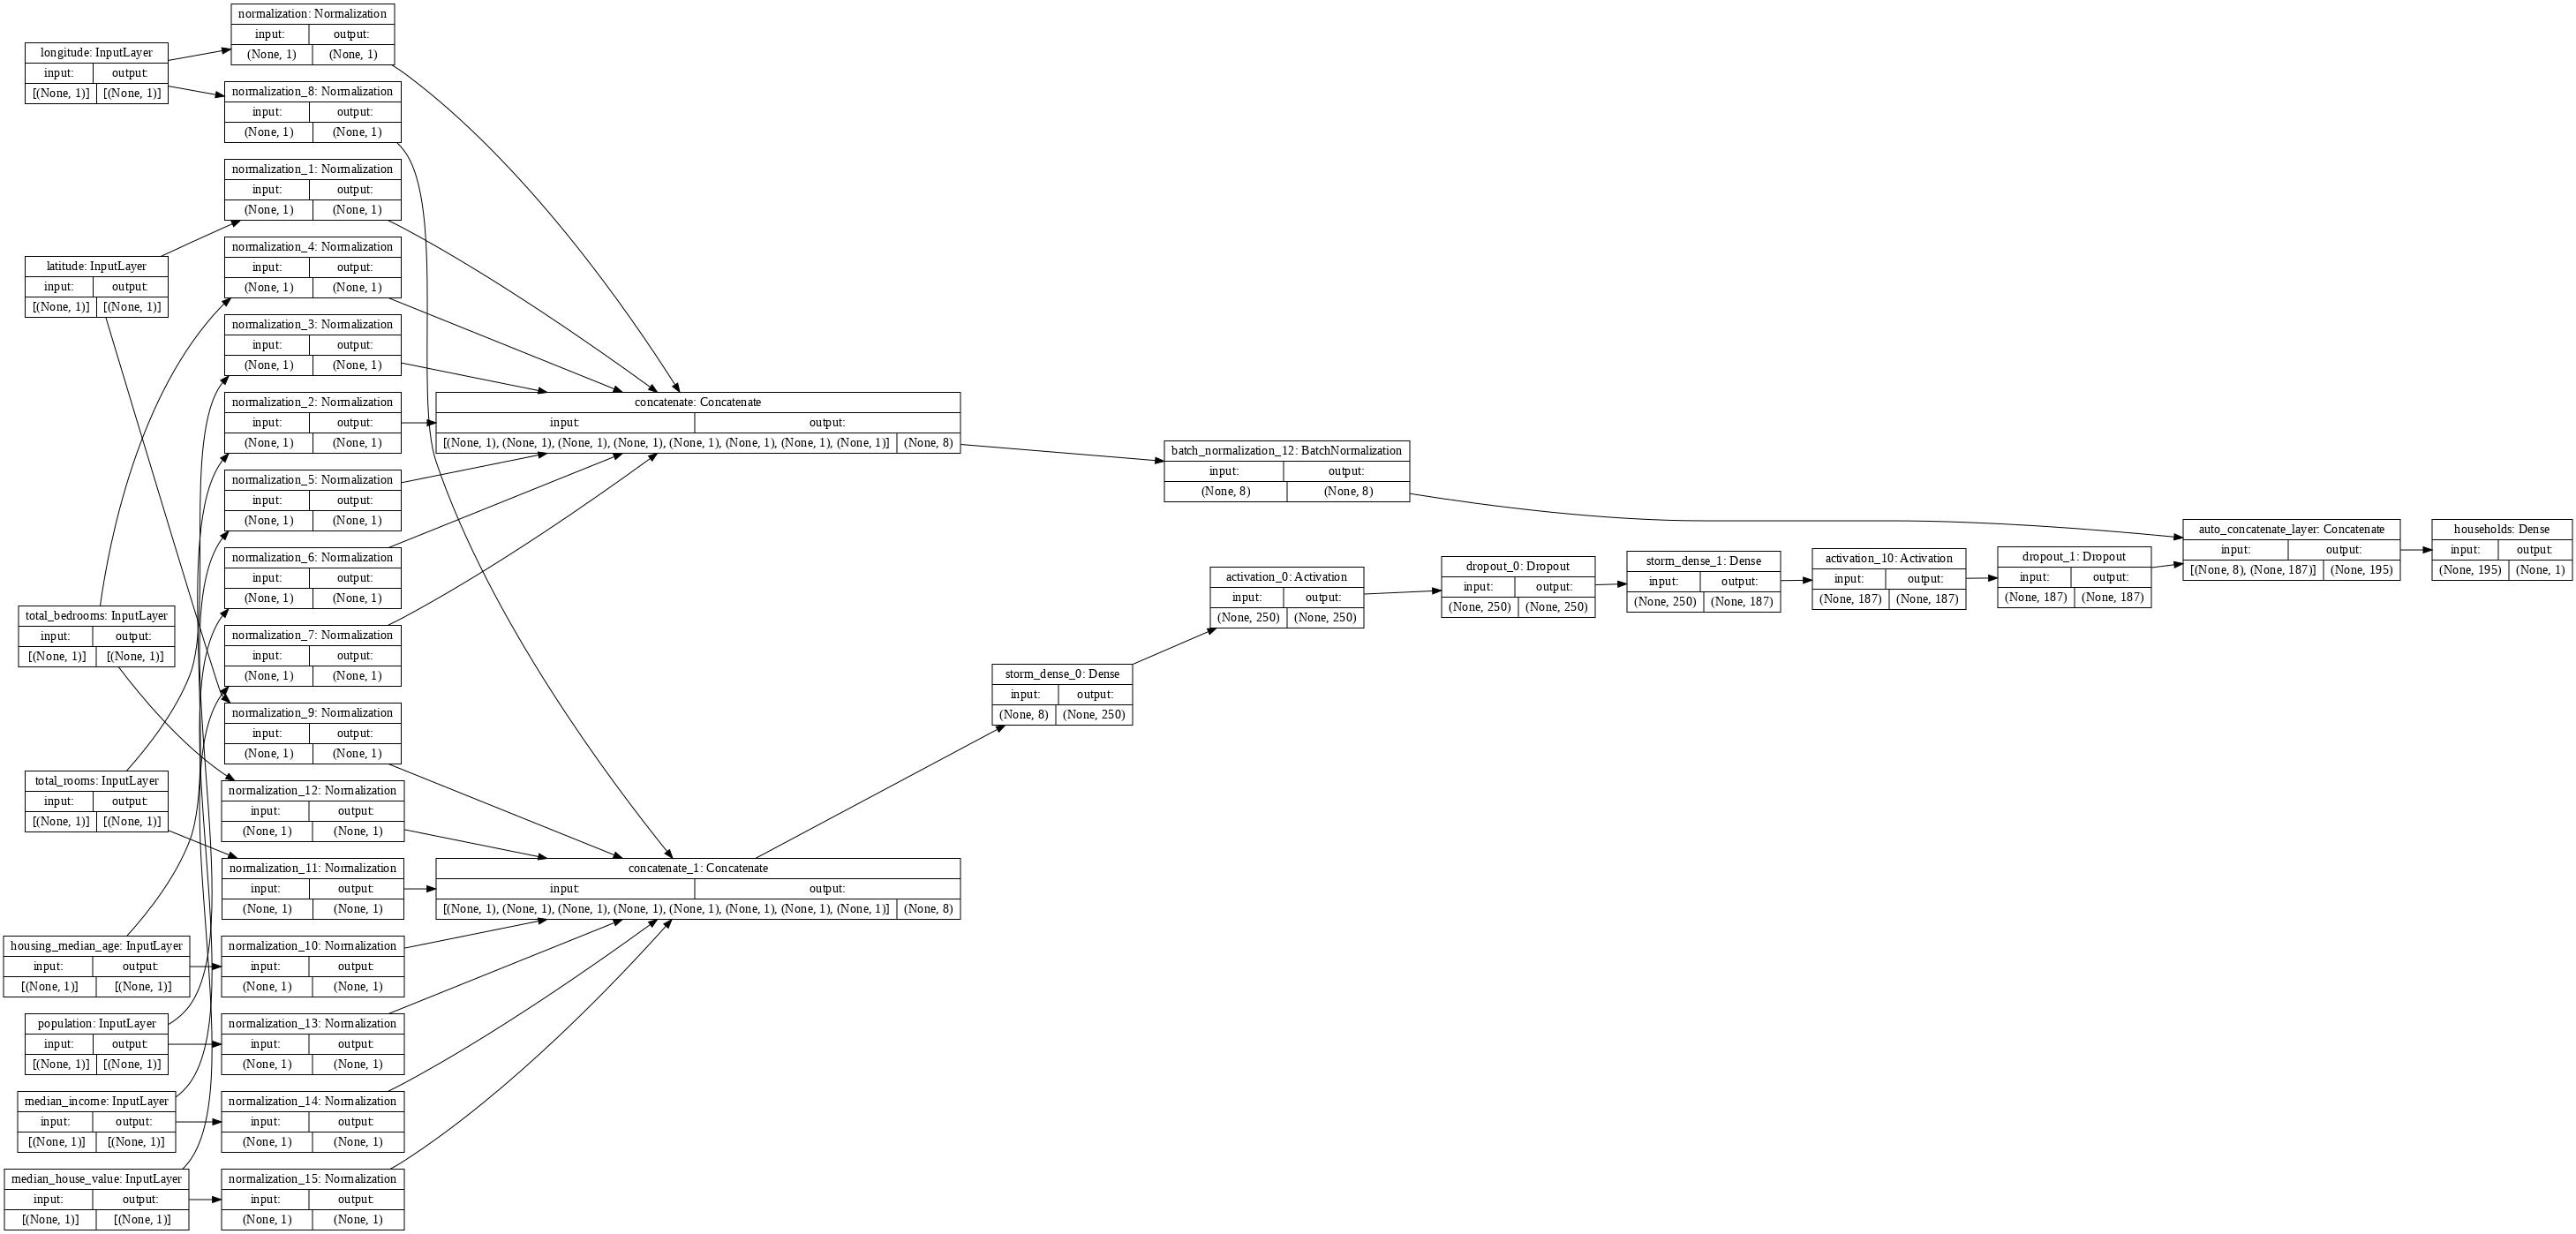

Model plot saved in file: deep_autoviml_jbb_autoviml_tabular3_auto_model_after.png


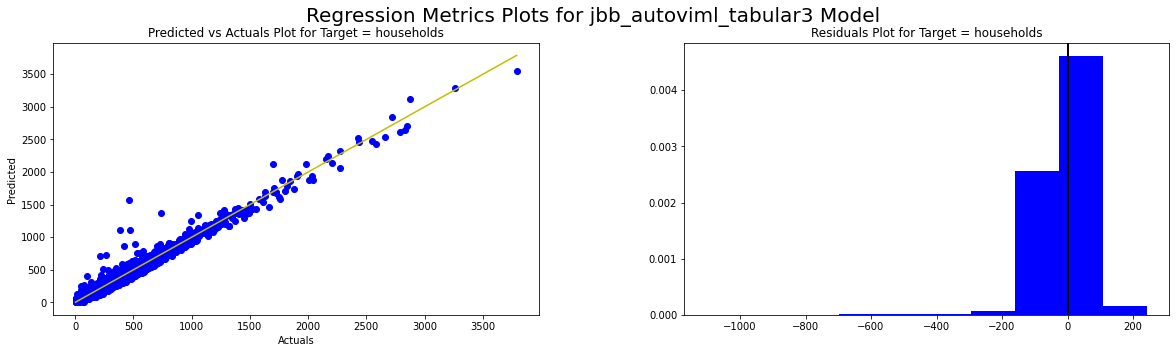

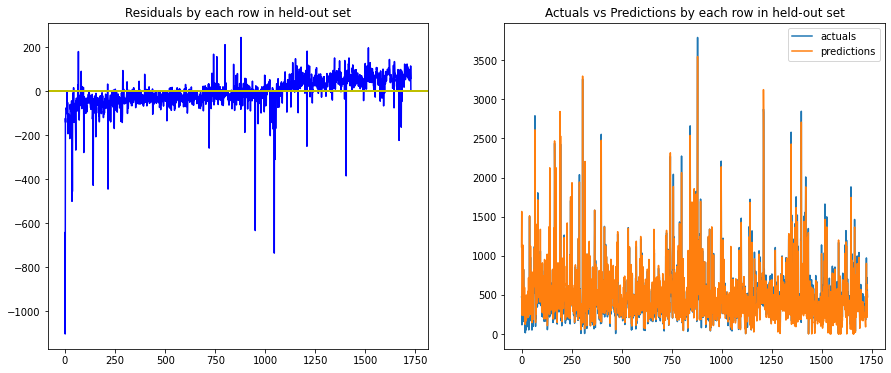

In [11]:
output = deepauto.fit(train, target, keras_model_type,project_name="jbb_autoviml_tabular3", keras_options=keras_options,
                 model_options=model_options, save_model_flag=False, use_my_model='', verbose=1)